In [1]:
import pickle
import pandas as pd
import geopandas as gpd 

In [203]:
geo_gdf = gpd.read_file('/Users/manasvivarma/Downloads/scam.geojson')
geo_gdf = geo_gdf[geo_gdf['type']!='Feature']

In [36]:

with open("best.p","rb") as f:
    og_gdf = pickle.load(f)


In [205]:
og_gdf = og_gdf["best_plans"][0]["gdf"]
# og_gdf
og_gdf['type'].unique()

array([ 2, 14,  4,  8,  1,  7, 10,  9,  3, 11, 12,  6,  5, 13])

In [206]:
# gdf = gdf[gdf['type']!='Feature']
geo_gdf['type'] = geo_gdf['type'].astype(int)

if geo_gdf.crs != og_gdf.crs:
    geo_gdf = geo_gdf.to_crs(og_gdf.crs)

# Filter gdf to include only rows with type 2 or 15
filtered_gdf1 = geo_gdf[geo_gdf['type'].isin([2, 15])]

# Concatenate the filtered gdf1 with gdf2
combined_gdf = pd.concat([filtered_gdf1, og_gdf[
    (og_gdf['geometry'].geom_type == 'Polygon') | 
    (og_gdf['type'] == 3) | 
    (og_gdf['geometry'].geom_type == 'Point')
]
 ], ignore_index=True)
combined_gdf['type'].unique()

# # Display the combined GeoDataFrame
# combined_gdf[combined_gdf['type']==4]

array([ 2, 15, 14,  4,  8,  1,  7, 10,  9,  3, 11, 12,  6,  5, 13])

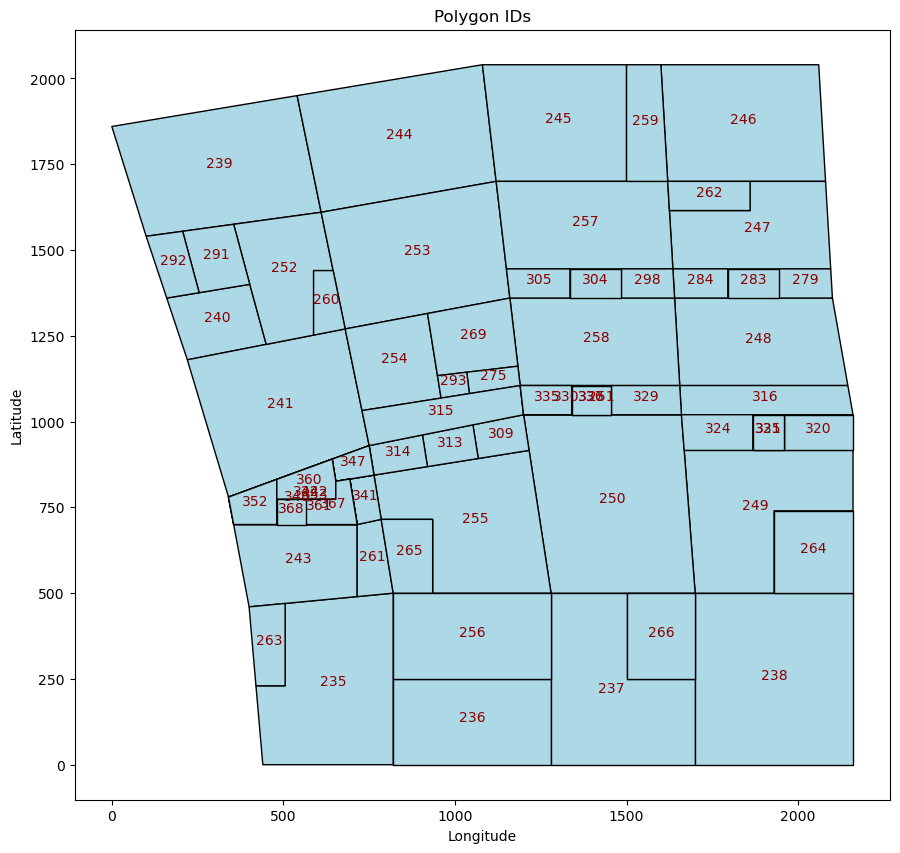

In [207]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter for polygons only
polygons_gdf = combined_gdf[combined_gdf['geometry'].geom_type == 'Polygon']

# Plot the polygons
fig, ax = plt.subplots(figsize=(12, 10))
polygons_gdf.plot(ax=ax, edgecolor="black", color="lightblue")

# Add labels for each polygon with their index/ID
for idx, row in polygons_gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, str(idx), fontsize=10, ha='center', color='darkred')

# Customize plot appearance
ax.set_title("Polygon IDs")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [208]:
combined_gdf.at[236, 'type'] = 14
combined_gdf['type'].unique()

array([ 2, 15, 14,  4,  1,  7, 10,  9,  3, 11, 12,  6,  5, 13,  8])

In [65]:
NON_BLOCK_LAND_USE = (
    'outside',
    'feasible',
    'road',
    'boundary',

)

BLOCK_LAND_USE = (
    'residential',
    'business',
    'wastemgmt',
    'green_l',
    'green_s',
    'school',
    'hospital_l',
    'hospital_s',
    'recreation',
    'office',
    'waterbody',
    'intersection',
    'drainage'

)

LAND_USE = (
    NON_BLOCK_LAND_USE + BLOCK_LAND_USE)

OUTSIDE = 0
FEASIBLE = 1
ROAD = 2
BOUNDARY = 3
RESIDENTIAL = 4
BUSINESS = 5
WASTEMGMT = 6
GREEN_L = 7
GREEN_S = 8
SCHOOL = 9
HOSPITAL_L = 10
HOSPITAL_S = 11
RECREATION = 12
OFFICE = 13
WATERBODY = 14
INTERSECTION = 15
DRAINAGE = 16



LAND_USE_ID = (
    OUTSIDE,
    FEASIBLE,
    ROAD,
    BOUNDARY,   
    RESIDENTIAL,
    BUSINESS,
    WASTEMGMT,
    GREEN_L,
    GREEN_S,
    SCHOOL,
    HOSPITAL_L,
    HOSPITAL_S,
    RECREATION,
    OFFICE,
    WATERBODY,
    INTERSECTION,
    DRAINAGE,

)

NUM_TYPES = len(LAND_USE_ID)
print(NUM_TYPES)


LAND_USE_ID_MAP = dict(
    zip(LAND_USE, LAND_USE_ID))

LAND_USE_ID_MAP_INV = dict(
    zip(LAND_USE_ID, LAND_USE))

print("heloooo", LAND_USE_ID_MAP_INV)

PUBLIC_SERVICES_ID = (
    BUSINESS,
    WASTEMGMT,
    SCHOOL,
    (HOSPITAL_L, HOSPITAL_S),
    RECREATION,
    OFFICE
)

PUBLIC_SERVICES = (
    'shopping',
    'wastemgmt',
    'education',
    'medical care',
    'entertainment',
    'office'

)

GREEN_ID = (
    GREEN_L,
    GREEN_S
)
GREEN_AREA_THRESHOLD = 2000

TYPE_COLOR_MAP = {
    'boundary': 'lightgreen',
    'business': 'fuchsia',
    'feasible': 'white',
    'green_l': 'green',
    'green_s': 'lightgreen',
    'hospital_l': 'blue',
    'hospital_s': 'cyan',
    'wastemgmt': 'gold',
    'outside': 'black',
    'residential': 'yellow',
    'road': 'red',
    'school': 'darkorange',
    'recreation': 'lavender',
    'office' : 'red',
    'waterbody': 'purple',
    'drainage' : 'black',
    'intersection': 'yellow'
}


17
heloooo {0: 'outside', 1: 'feasible', 2: 'road', 3: 'boundary', 4: 'residential', 5: 'business', 6: 'wastemgmt', 7: 'green_l', 8: 'green_s', 9: 'school', 10: 'hospital_l', 11: 'hospital_s', 12: 'recreation', 13: 'office', 14: 'waterbody', 15: 'intersection', 16: 'drainage'}


In [68]:

# gdf = combined_gdf
gdf["type_leg"] = gdf["type"].map(lambda x:LAND_USE_ID_MAP_INV[int(x)])

<Axes: >

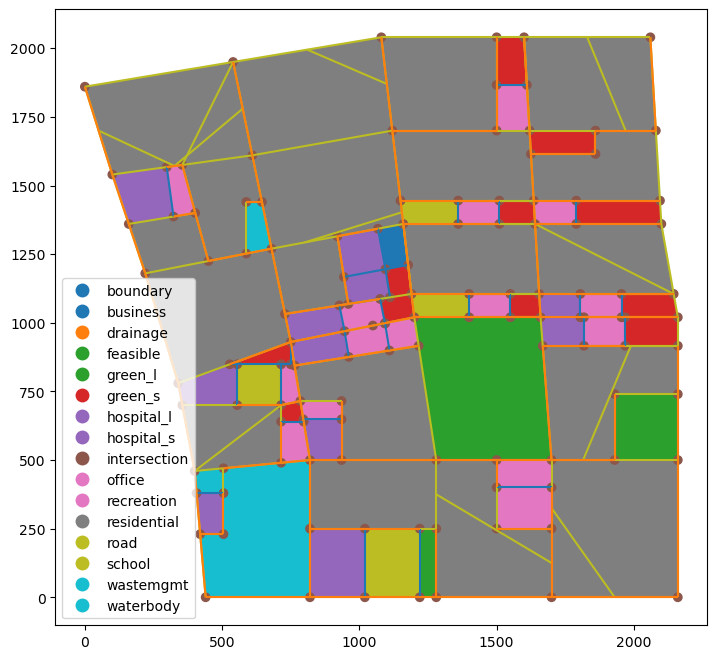

In [69]:
gdf.plot(column="type_leg",legend=True,figsize=(12, 8))

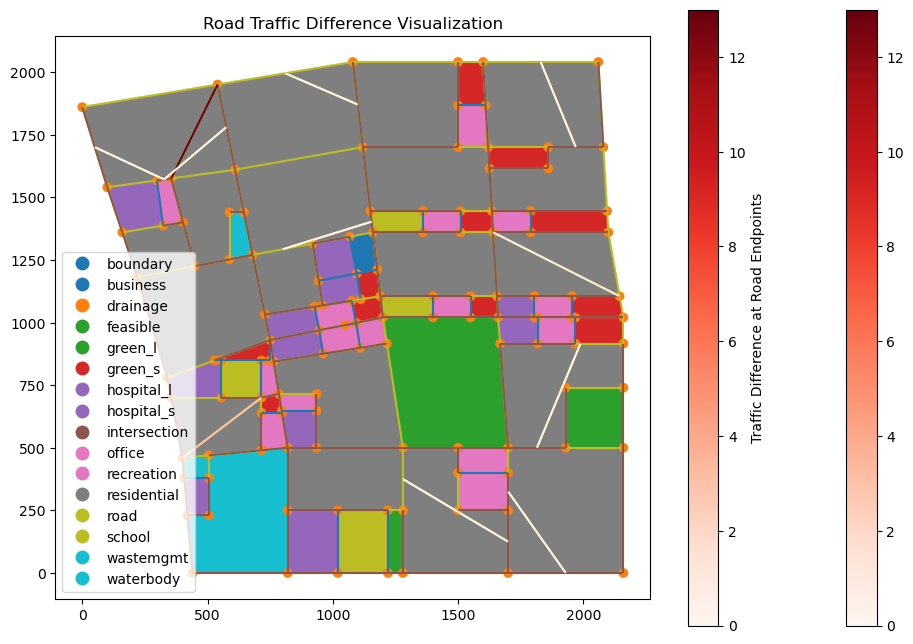

In [61]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

road_gdf = gdf[(gdf['geometry'].geom_type == 'LineString') & (gdf['population'] == 5)]

point_gdf = gdf[gdf['geometry'].geom_type == 'Point']

# Calculate traffic difference for each road based on endpoints
traffic_diffs = []
for _, road in road_gdf.iterrows():
    start_point_coord, end_point_coord = road['geometry'].coords[0], road['geometry'].coords[-1]
    
    # Match start and end points in the gdf by filtering points based on coordinates
    start_traffic = point_gdf[(point_gdf['geometry'].x == start_point_coord[0]) & 
                              (point_gdf['geometry'].y == start_point_coord[1])]['traffic'].values
    end_traffic = point_gdf[(point_gdf['geometry'].x == end_point_coord[0]) & 
                            (point_gdf['geometry'].y == end_point_coord[1])]['traffic'].values
    
    # If both start and end traffic values exist, calculate traffic difference
    if len(start_traffic) > 0 and len(end_traffic) > 0:
        traffic_diffs.append(abs(start_traffic[0] - end_traffic[0]))
    else:
        traffic_diffs.append(0)  # Handle cases where a point may not have traffic data

# Add traffic difference column to road_gdf
road_gdf = road_gdf.assign(traffic_diff=traffic_diffs)

# Normalize traffic difference for color scaling
norm = plt.Normalize(vmin=min(traffic_diffs), vmax=max(traffic_diffs))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot base gdf with type_leg as color
gdf.plot(column="type_leg", legend=True, ax=ax)

# Plot roads with color based on traffic difference
road_gdf.plot(column='traffic_diff', cmap='Reds', legend=True, norm=norm, ax=ax)

# Set title and colorbar
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='Reds'), ax=ax, label='Traffic Difference at Road Endpoints')
plt.title("Road Traffic Difference Visualization")
plt.show()


In [212]:
gdf["type_leg"].unique()

array(['road', 'drainage', 'waterbody', 'residential', 'feasible',
       'green_l', 'hospital_l', 'school', 'boundary', 'hospital_s',
       'recreation', 'wastemgmt', 'business', 'office', 'green_s'],
      dtype=object)

['road' 'drainage' 'waterbody' 'residential' 'feasible' 'green_l'
 'hospital_l' 'school' 'boundary' 'hospital_s' 'recreation' 'wastemgmt'
 'business' 'office' 'green_s']


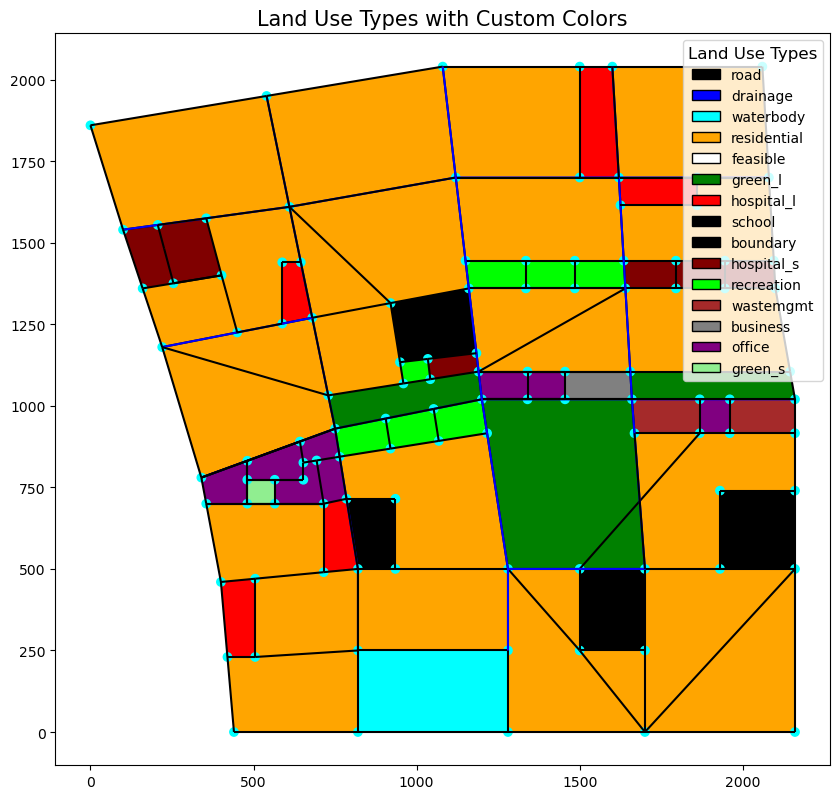

In [216]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define distinct and contrasting colors manually
custom_colors = [
    'black', 'blue', 'cyan', 'orange', 'white', 'green', 'red', 
    'black', 'black', 'maroon', 'lime', 'brown', 'grey','purple','lightgreen',
    'violet'

]

# Get the unique types
unique_types = gdf["type_leg"].unique()
print(unique_types)

# Create a dictionary that maps each unique type to a distinct color
type_color_map = dict(zip(unique_types, custom_colors))

# Assign colors to the GeoDataFrame based on the type_leg column
gdf["color"] = gdf["type_leg"].map(type_color_map)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use the assigned colors from the 'color' column
gdf.plot(ax=ax, color=gdf["color"])

# Create legend patches
legend_patches = [Patch(facecolor=color, edgecolor='black', label=land_use_type) 
                  for land_use_type, color in type_color_map.items()]

# Add legend to the plot
ax.legend(handles=legend_patches, title="Land Use Types", loc='upper right', fontsize=10, title_fontsize=12)

# Set plot title and show the plot
ax.set_title("Land Use Types with Custom Colors", fontsize=15)
plt.show()


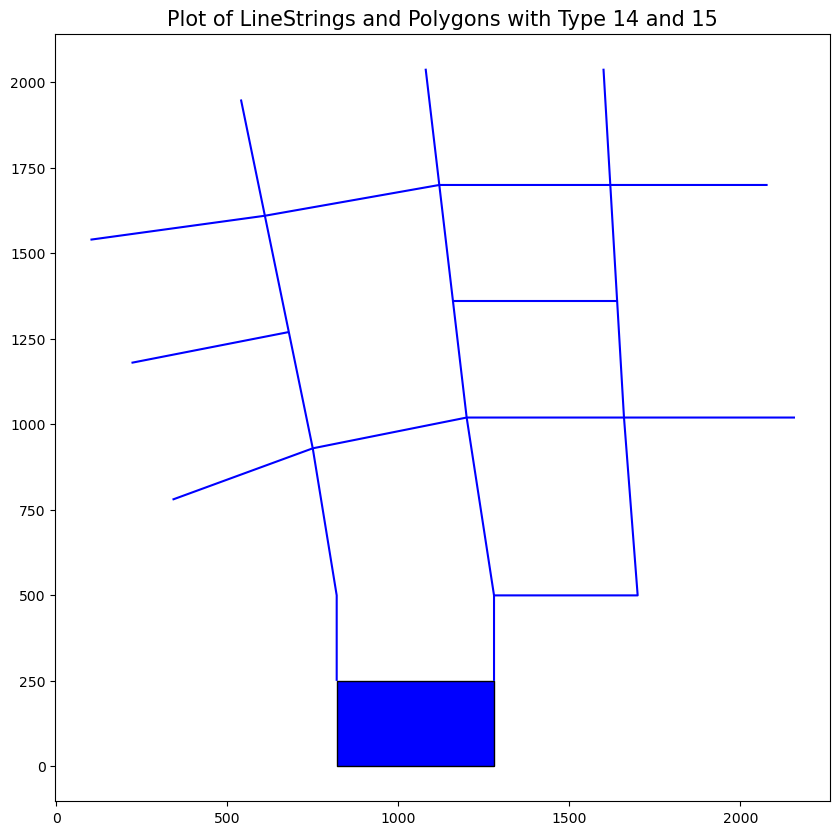

In [218]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to keep only rows with type 14 and 15 and geometry types LineString and Polygon
filtered_gdf = gdf[gdf['type'].isin([14, 15]) & gdf['geometry'].apply(lambda geom: geom.geom_type in ['LineString', 'Polygon'])]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='blue', edgecolor='black')

# Set plot title
ax.set_title('Plot of LineStrings and Polygons with Type 14 and 15', fontsize=15)

# Show the plot
plt.show()



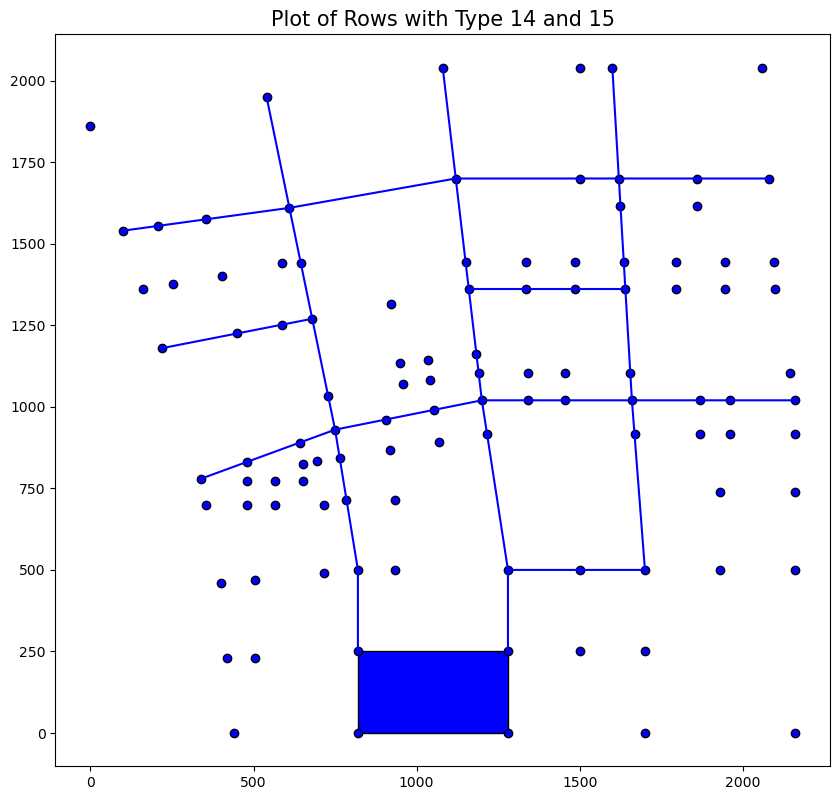

In [219]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to keep only rows with type 14 and 15
filtered_gdf = gdf[gdf['type'].isin([14, 15])]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='blue', edgecolor='black')

# Set plot title
ax.set_title('Plot of Rows with Type 14 and 15', fontsize=15)

# Show the plot
plt.show()

/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_59795/937760761.py:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersecting_points = points_gdf[points_gdf.geometry.intersects(filtered_gdf.unary_union)]
/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_59795/937760761.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


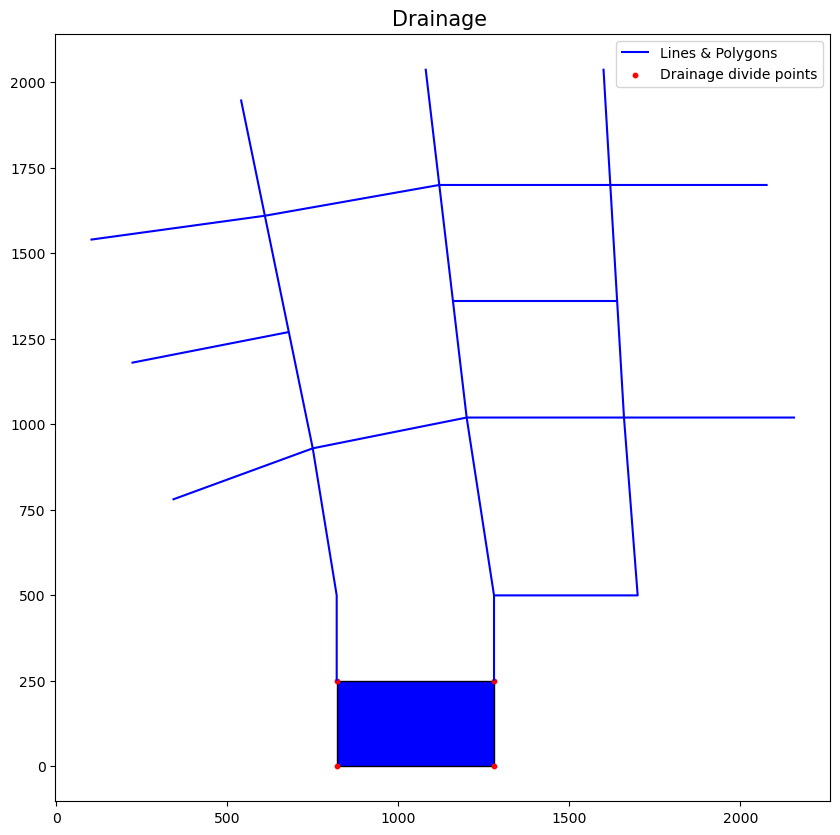

In [227]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to keep only rows with type 14 and 15 (LineStrings and Polygons)
filtered_gdf = gdf[gdf['type'].isin([14, 15])]
filtered_gdf = filtered_gdf[filtered_gdf['geometry'].geom_type.isin(['LineString','Polygon'])]

# Separate the points from the original GeoDataFrame
points_gdf = gdf[gdf['geometry'].geom_type == 'Point']

# Find points that intersect with the filtered LineStrings and Polygons
intersecting_points = points_gdf[points_gdf.geometry.intersects(filtered_gdf.unary_union)]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the filtered LineStrings and Polygons
filtered_gdf[filtered_gdf['geometry'].geom_type.isin(['LineString','Polygon'])].plot(ax=ax, color='blue', edgecolor='black', label='Lines & Polygons')

# Plot the intersecting points
intersecting_points.plot(ax=ax, color='red', markersize=10, label='Drainage divide points')

# Set plot title and legend
ax.set_title('Drainage ', fontsize=15)
ax.legend()

# Show the plot
plt.show()




<Axes: >

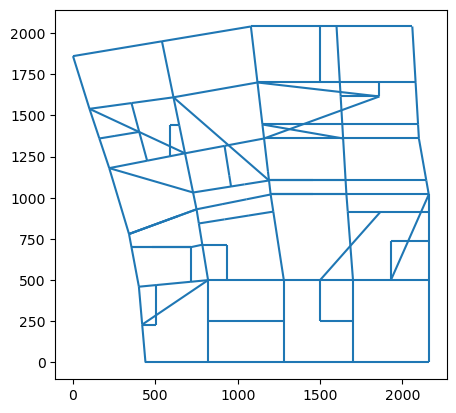

In [14]:
#gdf[gdf['population']==5].shape[0]
gdf[gdf["type"]==2].plot()

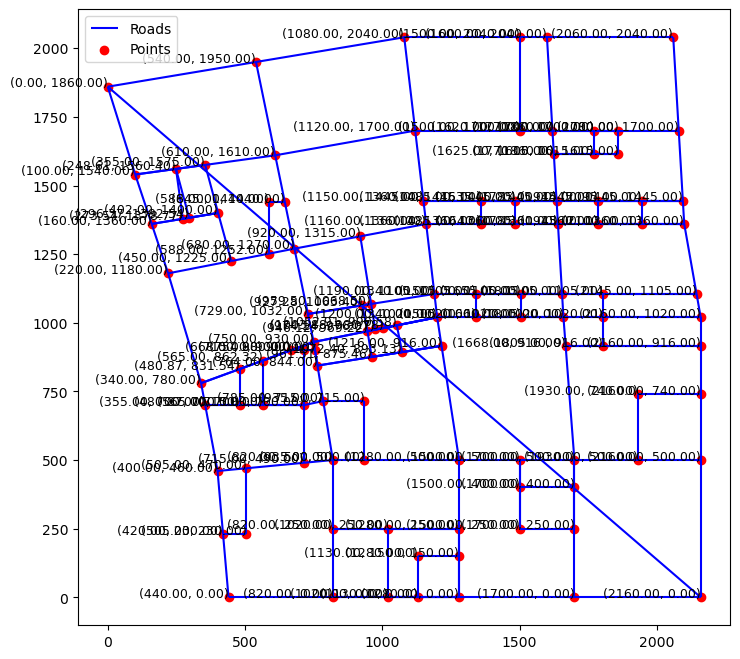

In [29]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to include only LineStrings (roads)
roads_gdf = gdf[gdf.geometry.type == 'LineString']

# Filter the GeoDataFrame to include only Points
points_gdf = gdf[gdf.geometry.type == 'Point']

# Plot the roads (LineStrings)
ax = roads_gdf.plot(color='blue', figsize=(10, 8), legend=True, label='Roads')

# Plot the points on the same plot
points_gdf.plot(ax=ax, color='red', marker='o', label='Points')

# Annotate the points with their geometry values (coordinates)
for idx, row in points_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y  # Extract x and y coordinates
    plt.text(x, y, f'({x:.2f}, {y:.2f})', fontsize=9, ha='right')  # Format and display coordinates

# Show the plot
plt.legend()
plt.show()

In [34]:
from shapely.geometry import LineString
import geopandas as gpd

new_line = LineString([(0.00, 1860.00), (2160.00, 0.00)])

# Check if the new LineString already exists in the gdf
if not ((gdf['geometry'] == new_line) & (gdf['type'] == 2)).any():
    # Create a new row for the gdf with the LineString and required attributes
    new_row = {
        'type': 2,               # Assuming '2' is the type for roads
        'existence': True,        # Set existence to True
        'geometry': new_line,     # The LineString geometry
        'population': 5           # Set population to 5 (since it represents a road)
    }

    # Convert the new row into a GeoDataFrame
    new_row_gdf = gpd.GeoDataFrame([new_row], geometry='geometry')

    # Append the new row to the existing gdf
    gdf = pd.concat([gdf, new_row_gdf], ignore_index=True)
    print("New road added to gdf.")
else:
    print("The specified road already exists in the gdf.")


The specified road already exists in the gdf.


In [35]:
gdf

,type,existence,geometry,rect,eqi,sc,population
0,2,True,"LINESTRING (440 0, 820 0)",NaN,NaN,NaN,NaN
1,2,False,"LINESTRING (820 0, 1020 0, 1130 0, 1280 0)",NaN,NaN,NaN,NaN
2,2,True,"LINESTRING (1280 0, 1700 0)",NaN,NaN,NaN,NaN
3,2,True,"LINESTRING (1700 0, 2160 0)",NaN,NaN,NaN,NaN
4,2,True,"LINESTRING (0 1860, 100 1540)",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
420,13,True,"POLYGON ((715 900, 754.884 900, 764 844, 785 7...",0.763517,0.945764,0.687109,NaN
421,8,True,"POLYGON ((750 930, 754.884 900, 715 900, 668 9...",0.500000,0.807934,0.498154,NaN
422,2,True,"LINESTRING (0 1860, 2160 0)",NaN,NaN,NaN,NaN
423,2,True,"LINESTRING (0 1860, 2160 0)",NaN,NaN,NaN,5.0


In [11]:
new_roads = gdf[(gdf['geometry'].geom_type == 'LineString') & 
                (gdf['type'] == 2) & 
                (gdf['population'] == 5)]

new_roads['length'] = new_roads['geometry'].length
mean_length = new_roads['length'].mean()
print(f"The mean length of the new roads is: {mean_length}")

The mean length of the new roads is: 882.5736627493872


/Users/manasvivarma/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [35]:
with open("/Users/manasvivarma/Downloads/working code /urban_planning/cfg/test_data/real/hlg/init_plan_hlg.pickle","rb") as f:
    data = pickle.load(f)


In [36]:
g=data['gdf']

In [38]:
g[g['type']==16]

,type,existence,geometry,population,traffic
id,,,,,


In [23]:
g.loc[183]

type                                                         15
existence                                                  True
geometry      POLYGON ((820 0, 440 0, 420 230, 505 230, 505 ...
population                                               4794.0
traffic                                                     NaN
Name: 183, dtype: object

<Axes: >

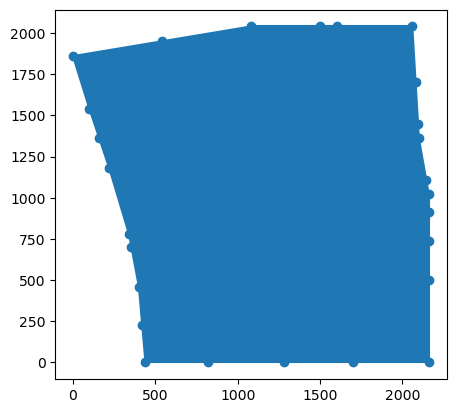

/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_59795/3583346547.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  g[g['type']==3].plot()


<Axes: >

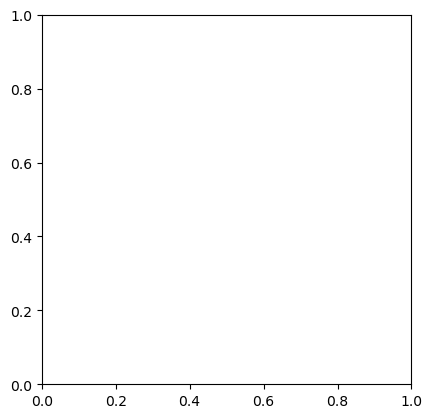

In [31]:
g[g['type']==3].plot()

In [34]:
g[g.geometry.type == 'LineString']

,type,existence,geometry,population,traffic
id,,,,,
0,2,True,"LINESTRING (440 0, 820 0)",NaN,NaN
1,2,True,"LINESTRING (820 0, 1280 0)",NaN,NaN
2,2,True,"LINESTRING (1280 0, 1700 0)",NaN,NaN
3,2,True,"LINESTRING (1700 0, 2160 0)",NaN,NaN
4,2,True,"LINESTRING (0 1860, 100 1540)",NaN,NaN
...,...,...,...,...,...
106,2,True,"LINESTRING (920 1315, 959.5 1068.5)",NaN,NaN
107,2,True,"LINESTRING (729 1032, 959.5 1068.5)",NaN,NaN
108,2,True,"LINESTRING (959.5 1068.5, 1190 1105)",NaN,NaN


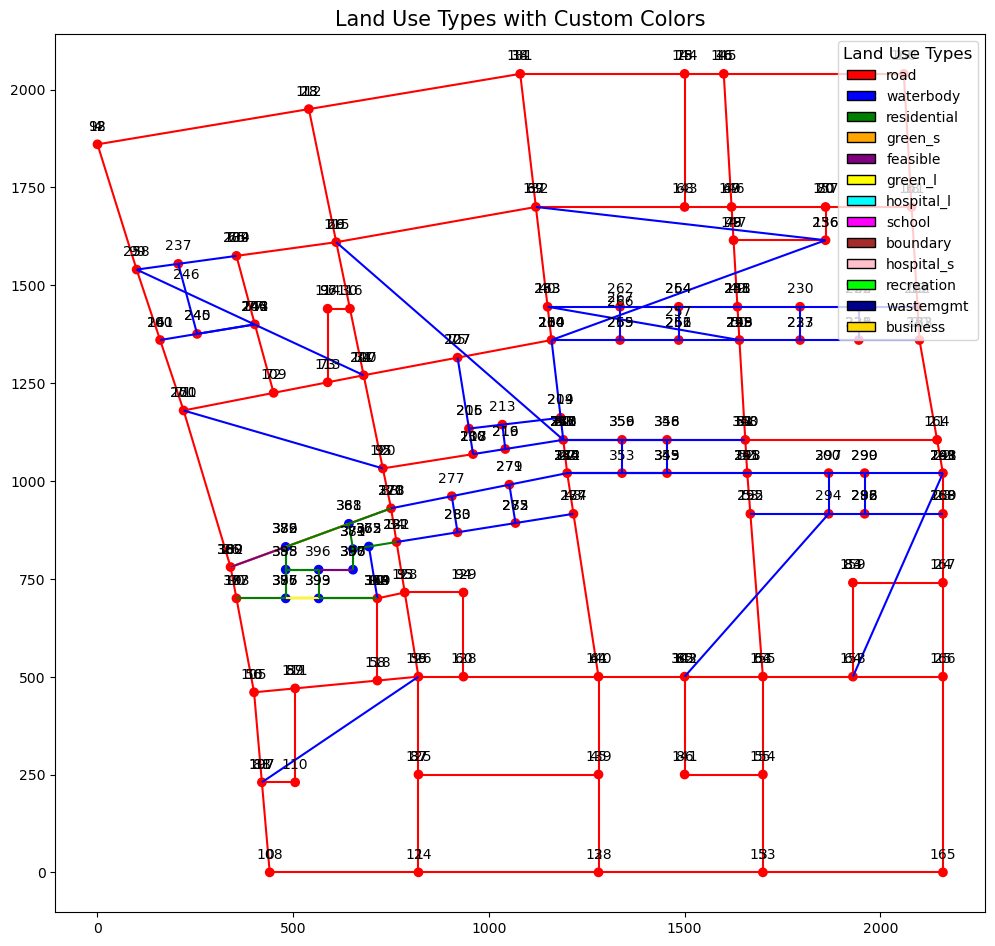

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define distinct and contrasting colors manually
custom_colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 
    'magenta', 'brown', 'pink', 'lime', 'darkblue', 'gold'
]

# Get the unique types
unique_types = gdf["type_leg"].unique()

# Create a dictionary that maps each unique type to a distinct color
type_color_map = dict(zip(unique_types, custom_colors))

# Assign colors to the GeoDataFrame based on the type_leg column
gdf["color"] = gdf["type_leg"].map(type_color_map)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Use the assigned colors from the 'color' column, only for lines and points
gdf[gdf['geometry'].geom_type.isin(['LineString', 'Point'])].plot(ax=ax, color=gdf["color"])

# Annotate each point and line with its index
for idx, row in gdf.iterrows():
    if row['geometry'].geom_type in ['Point', 'LineString']:  # Annotate only points and line strings
        x, y = row['geometry'].xy
        ax.annotate(f"{idx}", (x[0], y[0]), textcoords="offset points", xytext=(0,10), ha='center')

# Create legend patches
legend_patches = [Patch(facecolor=color, edgecolor='black', label=land_use_type) 
                  for land_use_type, color in type_color_map.items()]

# Add legend to the plot
ax.legend(handles=legend_patches, title="Land Use Types", loc='upper right', fontsize=10, title_fontsize=12)

# Set plot title and show the plot
ax.set_title("Land Use Types with Custom Colors", fontsize=15)
plt.show()


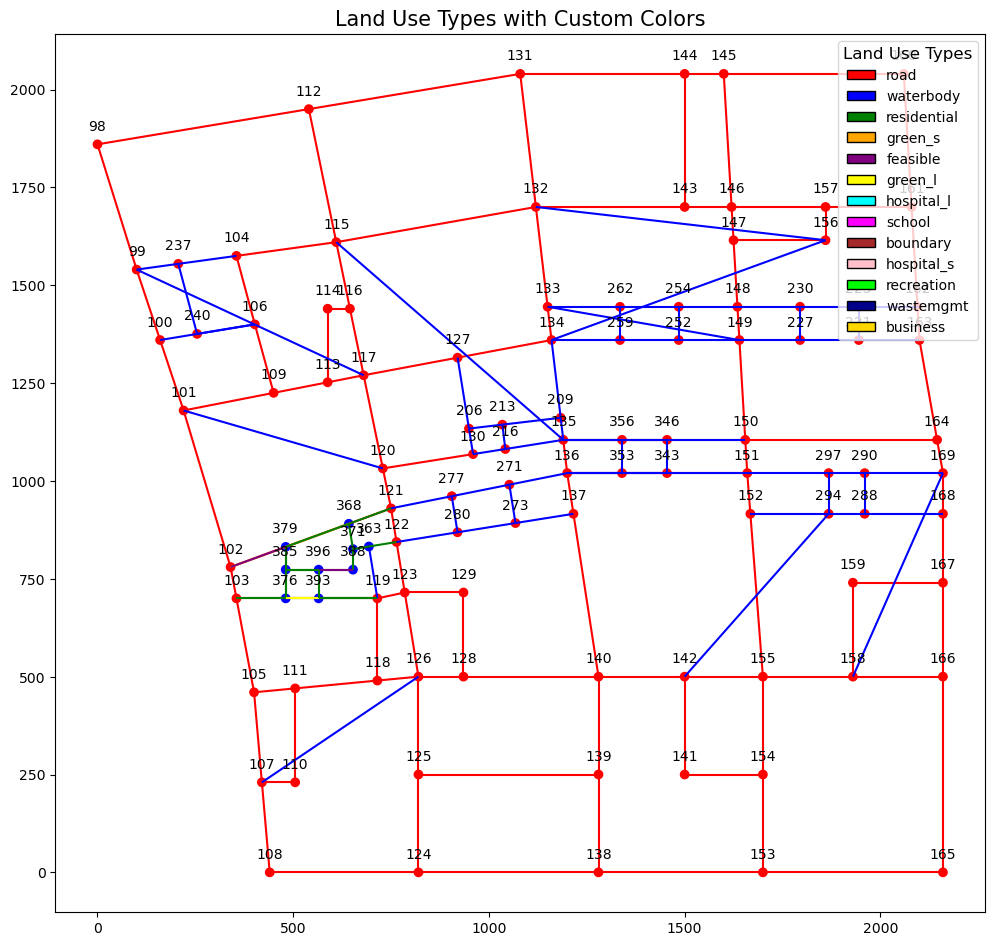

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define distinct and contrasting colors manually
custom_colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 
    'magenta', 'brown', 'pink', 'lime', 'darkblue', 'gold'
]

# Get the unique types
unique_types = gdf["type_leg"].unique()

# Create a dictionary that maps each unique type to a distinct color
type_color_map = dict(zip(unique_types, custom_colors))

# Assign colors to the GeoDataFrame based on the type_leg column
gdf["color"] = gdf["type_leg"].map(type_color_map)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Use the assigned colors from the 'color' column, only for lines and points
gdf[gdf['geometry'].geom_type.isin(['LineString', 'Point'])].plot(ax=ax, color=gdf["color"])

# Create a set to track placed annotations
placed_annotations = set()

# Annotate each point and line with its index
for idx, row in gdf.iterrows():
    if row['geometry'].geom_type in ['Point']:  # Annotate only points and line strings
        x, y = row['geometry'].xy

        # Find a suitable position for the label
        label_pos = (x[0], y[0])  # Start at the geometry's position

        # Stagger the label if there's a potential overlap
        while label_pos in placed_annotations:
            # Adjust the position based on the index to stagger
            label_pos = (label_pos[0] + 0.5, label_pos[1] + 0.5)

        ax.annotate(f"{idx}", label_pos, textcoords="offset points", xytext=(0, 10), ha='center')
        placed_annotations.add(label_pos)

# Create legend patches
legend_patches = [Patch(facecolor=color, edgecolor='black', label=land_use_type) 
                  for land_use_type, color in type_color_map.items()]

# Add legend to the plot
ax.legend(handles=legend_patches, title="Land Use Types", loc='upper right', fontsize=10, title_fontsize=12)

# Set plot title and show the plot
ax.set_title("Land Use Types with Custom Colors", fontsize=15)
plt.show()


In [46]:
with open("best.p","rb") as f:
    og_gdf = pickle.load(f)

og_gdf.keys()

dict_keys(['actor_critic_dict', 'loss_iter', 'best_rewards', 'best_plans', 'current_rewards', 'current_plans', 'iteration'])

In [47]:
og_gdf['current_plans']

[{'road_network': -1.0,
  'life_circle': 1.3583223582333377,
  'greenness': 0.6554084049829839,
  'wastemgmt': 0.0,
  'drainage': 0,
  'concept': -1.0,
  'life_circle_info': {'life_circle_15min': 0.9122807017543861,
   'life_circle_10min': 0.543859649122807,
   'life_circle_5min': 0.31578947368421045,
   'life_circle_10min_area': 0.5072379984991058,
   'decentralization_reward': 0.27529527538359383,
   'utility': 0.16304778109745893,
   'even_population_distribution_reward': 0.5476685252855651,
   'traffic_reward': 0.38994655137717715,
   'shopping': 0.21052631578947367,
   'wastemgmt': 0.3157894736842105,
   'education': 0.5263157894736842,
   'medical care': 0.6842105263157895,
   'entertainment': 0.8421052631578947,
   'working': 0.6842105263157895},
  'concept_info': {},
  'land_use_reward': 11.521987270849685,
  'gdf':      type  existence                                   geometry   population  \
  0       2       True                  LINESTRING (440 0, 820 0)     0.000000   
  

In [48]:
og_gdf['best_plans'][0]['gdf']

,type,existence,geometry,population,traffic,rect,eqi,sc
0,2,True,"LINESTRING (440 0, 820 0)",0.000000,NaN,NaN,NaN,NaN
1,2,True,"LINESTRING (1280 0, 1700 0)",730.434783,NaN,NaN,NaN,NaN
2,2,True,"LINESTRING (1700 0, 2160 0)",1102.083333,NaN,NaN,NaN,NaN
3,2,True,"LINESTRING (0 1860, 100 1540)",691.998019,NaN,NaN,NaN,NaN
4,2,True,"LINESTRING (100 1540, 160 1360)",0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
112,16,True,"LINESTRING (1620 1700, 1610.213 1866.379)",NaN,NaN,NaN,NaN,NaN
113,16,True,"LINESTRING (1860 1615, 1860 1700)",NaN,NaN,NaN,NaN,NaN
114,16,True,"LINESTRING (1610.213 1866.379, 1600 2040)",NaN,NaN,NaN,NaN,NaN
115,16,True,"LINESTRING (1860 1700, 2080 1700)",NaN,NaN,NaN,NaN,NaN


In [49]:
gdf=og_gdf['best_plans'][0]['gdf']

<Axes: >

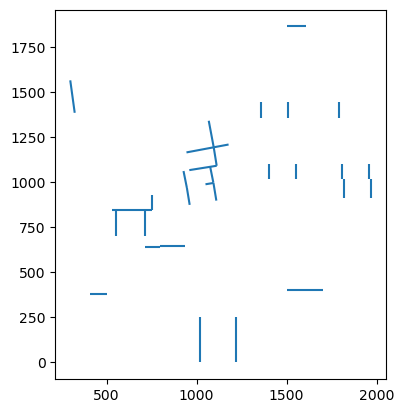

In [50]:
gdf[gdf['type']==3].plot()

In [51]:
gdf[gdf['geometry'].geom_type=='Point']

,type,existence,geometry,population,traffic,rect,eqi,sc
83,15,True,POINT (0 1860),289.0,4.0,NaN,NaN,NaN
84,15,True,POINT (100 1540),524.0,18.0,NaN,NaN,NaN
85,15,True,POINT (160 1360),741.0,20.0,NaN,NaN,NaN
86,15,True,POINT (220 1180),234.0,4.0,NaN,NaN,NaN
87,15,True,POINT (340 780),313.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
437,15,True,POINT (1550 1105),NaN,NaN,NaN,NaN,NaN
444,15,True,POINT (1510 1360),NaN,NaN,NaN,NaN,NaN
447,15,True,POINT (1510 1445),NaN,NaN,NaN,NaN,NaN
454,15,True,POINT (1955 1020),NaN,NaN,NaN,NaN,NaN


In [52]:
population_stats = {
    'Mean': gdf['population'].mean(skipna=True),
    'Median': gdf['population'].median(skipna=True),
    'Min': gdf['population'].min(skipna=True),
    'Max': gdf['population'].max(skipna=True),
    '25th Percentile': gdf['population'].quantile(0.25, interpolation='linear'),
    '50th Percentile': gdf['population'].quantile(0.5, interpolation='linear'),
    '75th Percentile': gdf['population'].quantile(0.75, interpolation='linear')
}

# Print all statistics at once
for stat, value in population_stats.items():
    print(f"{stat}: {value}")


Mean: 673.1745719279613
Median: 424.59811657037756
Min: 0.0
Max: 4600.0
25th Percentile: 214.9455734811939
50th Percentile: 424.59811657037756
75th Percentile: 839.712186160441


460.27852044339534 ooooo 5.0 ooooo 0.25      0.000000
0.50      5.000000
0.75    678.679106
Name: population, dtype: float64


In [43]:
gdf[(gdf['geometry'].geom_type == 'Point') & (gdf['population'] < 100)]

,type,existence,geometry,population,traffic,rect,eqi,sc
96,15,True,POINT (0 1860),0.0,4.0,NaN,NaN,NaN
97,15,True,POINT (100 1540),0.0,18.0,NaN,NaN,NaN
98,15,True,POINT (160 1360),0.0,20.0,NaN,NaN,NaN
99,15,True,POINT (220 1180),0.0,4.0,NaN,NaN,NaN
100,15,True,POINT (340 780),0.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
163,15,True,POINT (2160 0),0.0,11.0,NaN,NaN,NaN
164,15,True,POINT (2160 500),0.0,10.0,NaN,NaN,NaN
165,15,True,POINT (2160 740),0.0,6.0,NaN,NaN,NaN
166,15,True,POINT (2160 916),0.0,15.0,NaN,NaN,NaN


In [45]:
print(gdf[gdf['geometry'].geom_type == 'Polygon']['population'].dropna().unique())


[   0.   3200.   4600.   3601.    883.7  3447.   1525.5  3669.   2720.
 3128.   1942.25 2422.5  2856.32  114.4  1471.14 3465.   1175.85 2939.05
 2300.   2511.75 2409.75]
